<a href="https://colab.research.google.com/github/aadyasingh55/BritishAirwaysReviewAnalysis/blob/main/BritishAirways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping

In [ ]:
!pip install requests
!pip install html5lib
!pip install bs4
from bs4 import BeautifulSoup
import requests

In [ ]:
url = 'https://www.airlinequality.com/airline-reviews/british-airways/'
r = requests.get(url)
htmlcontent = r.content
htmlcontent

b'<!doctype html>\n\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html lang="en-GB">\n<!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n\n    <title>British Airways Customer Reviews - SKYTRAX</title>\n\n    <!-- Google Chrome Frame for IE -->\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n    <!-- mobile meta -->\n    <meta name="HandheldFriendly" content="True">\n    <meta name="MobileOptimized" content="320">\n    <meta name="viewport"\n        content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" />\n    <!-- icons & favicons -->\n    <link rel="apple-touch-icon" href="https://www.airlinequal

In [ ]:
soup = BeautifulSoup(htmlcontent,'html.parser')
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-GB">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<title>British Airways Customer Reviews - SKYTRAX</title>
<!-- Google Chrome Frame for IE -->
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<!-- mobile meta -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport">
<!-- icons & favicons -->
<link href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/apple-

In [ ]:
soup.find_all('div', class_='review-stats')

[<div class="review-stats">
 <table class="review-ratings">
 <tr><td class="review-rating-header type_of_traveller">Type Of Traveller</td><td class="review-value">Family Leisure</td></tr>
 <tr><td class="review-rating-header cabin_flown">Seat Type</td><td class="review-value">Economy Class</td></tr>
 <tr><td class="review-rating-header route">Route</td><td class="review-value">London to Algiers</td></tr>
 <tr><td class="review-rating-header date_flown">Date Flown</td><td class="review-value">August 2023</td></tr>
 <tr>
 <td class="review-rating-header seat_comfort">Seat Comfort</td>
 <td class="review-rating-stars stars"><span class="star fill">1</span><span class="star">2</span><span class="star">3</span><span class="star">4</span><span class="star">5</span></td>
 </tr>
 <tr>
 <td class="review-rating-header cabin_staff_service">Cabin Staff Service</td>
 <td class="review-rating-stars stars"><span class="star fill">1</span><span class="star">2</span><span class="star">3</span><span cl

In [ ]:
reviews = []
for review in soup.find_all('div', class_='text_content'):
    review_text = review.get_text()
    reviews.append(review_text)

In [ ]:
reviews

['Not Verified | The staff are very rude and not trained properly. No exceptions are made for children and elderly people. The price of the ticket is very expensive given the distance and the service is extremely extremely poor',
 '✅ Trip Verified |  Good domestic flight operated by BA Cityflyer. Ground service at check-in Edinburgh airport was particularly friendly and helpful. The flight departed on time and arrived earlier than scheduled. A complimentary drink and snack (albeit tiny!) were served. Generally it seems that the quality of the Cityflyer subsidiary is superior to the mainline British Airways flights.',
 'Not Verified | Failed at all basic travel fundamentals: 1) Our flight was delayed. 2) Staff demanded that we check in our carry on luggage even though we met our carry on allowance. The fact that we have a tight bus connection was totally ignored. 3) Staff were quite unpleasant.',
 "✅ Trip Verified |  They lost my baggage in a very simple situation. It's been three weeks

# Storing Reviews in DataFrame

In [ ]:
import pandas as pd
df = pd.DataFrame(reviews)
df

,0
0,Not Verified | The staff are very rude and not...
1,✅ Trip Verified | Good domestic flight operat...
2,Not Verified | Failed at all basic travel fund...
3,✅ Trip Verified | They lost my baggage in a v...
4,✅ Trip Verified | Late boarding led to a one ...
5,✅ Trip Verified | As usual the flight is delay...
6,✅ Trip Verified | I had the most fantastic BA...
7,✅ Trip Verified | Couldn’t book in online. Ar...
8,✅ Trip Verified | London Heathrow to Mumbai in...
9,"✅ Trip Verified | Keflavík, Iceland to London ..."


In [ ]:
df[['Verified', 'Review']] = df[0].str.split('|', 1, expand=True)
df['Verified'] = df['Verified'].str.strip()  # Remove leading/trailing whitespace

# Drop the original column
df.drop(columns=0, inplace=True)

print(df)


          Verified                                             Review
0     Not Verified   The staff are very rude and not trained prope...
1  ✅ Trip Verified    Good domestic flight operated by BA Cityflye...
2     Not Verified   Failed at all basic travel fundamentals: 1) O...
3  ✅ Trip Verified    They lost my baggage in a very simple situat...
4  ✅ Trip Verified    Late boarding led to a one hour flight leavi...
5  ✅ Trip Verified   As usual the flight is delayed. BA try to bla...
6  ✅ Trip Verified    I had the most fantastic BA Flight today. Th...
7  ✅ Trip Verified    Couldn’t book in online. Arrived at check in...
8  ✅ Trip Verified   London Heathrow to Mumbai in a Boeing 787-8 i...
9  ✅ Trip Verified   Keflavík, Iceland to London Heathrow on an A3...


<ipython-input-102-5cbbab85f3b0>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Verified', 'Review']] = df[0].str.split('|', 1, expand=True)


# Topic Modelling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Review'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)


LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
def get_top_words_per_topic(model, feature_names, n_words=10):
    top_words_per_topic = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
        top_words_per_topic.append(top_words)
    return top_words_per_topic

feature_names = vectorizer.get_feature_names_out()
top_words_per_topic = get_top_words_per_topic(lda, feature_names)

for i, top_words in enumerate(top_words_per_topic):
    print(f"Topic {i + 1}: {', '.join(top_words)}")

Topic 1: service, don, staff, fact, unpleasant, delayed, heathrow, connection, luggage, seats
Topic 2: flight, ba, staff, comfortable, board, check, don, best, delayed, service
Topic 3: service, don, staff, fact, unpleasant, delayed, heathrow, connection, luggage, seats
Topic 4: class, business, club, heathrow, service, product, wifi, onboard, lounge, british
Topic 5: service, don, staff, fact, unpleasant, delayed, heathrow, connection, luggage, seats


# Sentiment Analysis

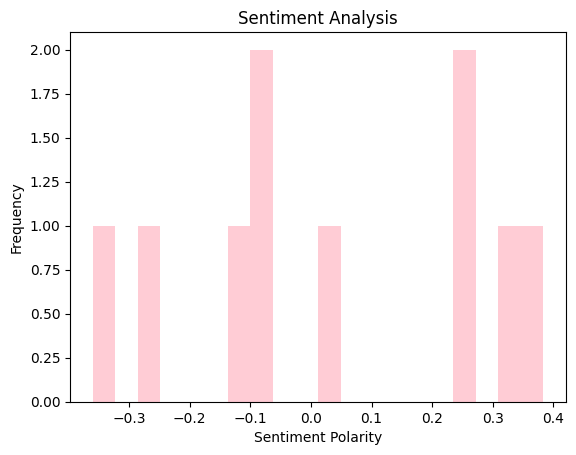

In [ ]:
from textblob import TextBlob
from matplotlib import pyplot as plt
df['Sentiment']= df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.hist(df['Sentiment'], bins=20, color='pink',alpha = 0.8)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.show()

# WordCloud

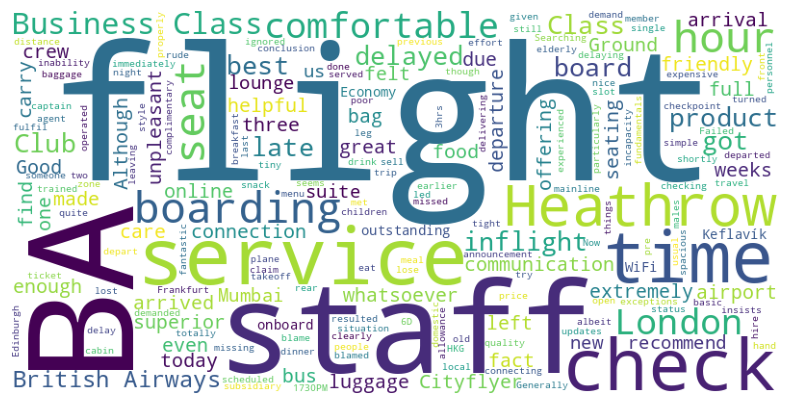

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 800, height = 400, background_color = 'white').generate(''.join(df['Review']))
plt.figure(figsize = (10,5))
plt.imshow(wc)
plt.axis('off')
plt.show()